In [1]:
import pandas as pd
import torch
import data_process as dp
import embed
import matplotlib.pyplot as plt
import umap

device = "cuda" if torch.cuda.is_available() else "cpu"

2024-03-03 00:27:09.626812: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-03 00:27:09.673231: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 00:27:09.673274: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 00:27:09.674452: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-03 00:27:09.681565: I tensorflow/core/platform/cpu_feature_guar

In [2]:
model = embed.load_model("./checkpoint-large-2.pt", device)

In [3]:
model.to(device)
model.eval()


GPT(
  (token_embedding_table): Embedding(20, 256)
  (position_embedding_table): Embedding(128, 256)
  (blocks): Sequential(
    (0): Block(
      (ln_1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (attn): CausalSelfAttention(
        (c_attn): Linear(in_features=256, out_features=768, bias=True)
        (c_proj): Linear(in_features=256, out_features=256, bias=True)
        (attn_dropout): Dropout(p=0.0, inplace=False)
        (resid_dropout): Dropout(p=0.0, inplace=False)
      )
      (ln_2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=256, out_features=1024, bias=True)
        (1): ReLU()
        (2): Linear(in_features=1024, out_features=256, bias=True)
        (3): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (ln_1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (attn): CausalSelfAttention(
        (c_attn): Linear(in_features=256, out_features=768, bias=True)
   

In [4]:
df = pd.read_parquet("./datasets/pdb-no-model-no-asm-64-2048.parquet").sample(50_000)
len(df)

50000

In [5]:
res = embed.to_embeddings(df, model, 256, device)

100%|██████████| 50000/50000 [17:14<00:00, 48.33it/s]


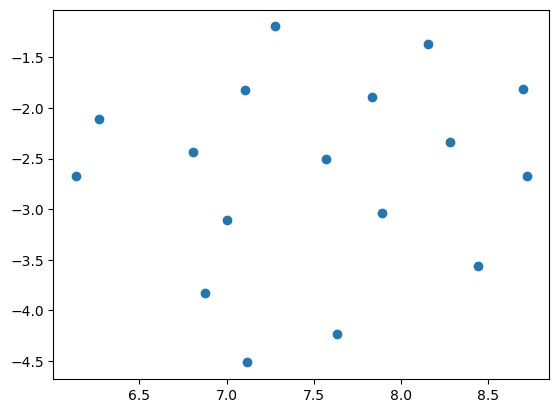

In [21]:
mapper = umap.UMAP()
embed2D = mapper.fit_transform(res[0])
plt.scatter(embed2D[:, 0], embed2D[:, 1])

In [29]:
embed.export(df, embed2D, "embed2D-large-2-50k.parquet")

In [7]:
pd.DataFrame({"x": embed2D[:, 0], "y": embed2D[:, 1], "name": res[1]}).to_parquet("embed2D-large-2-50k-all.parquet")

In [30]:
[1,2,3][2:3]

[3]